<a href="https://colab.research.google.com/github/mofuoku417/Multivariate-Time-Series-Forecasting-of-Crude-Palm-Oil-Price-Using-Machine-Learning-Techniques/blob/main/Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objective
The goal of this study is to apply Holt-Winters Technique to predict monthly crude oil price. 

###Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Loading the libraries

In [159]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

###Define Functions to Facilitate Metrics Evaluation

In [4]:
#To compute Mean Directional Accuracy
def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

#Calculate the Mean Absolute Percentage Error
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
    return mape

#Calculate the Root Mean Squared Error:
def RMSE(y_true, y_pred): 
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

###Define Required Functions

In [148]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Calculate the following evaluation metrics:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        MSE, MAE, RMSE, MAPE and R² 
    '''    
    print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end=='\n\n')

###Load Data

In [102]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics

In [119]:
#reading the csv file into pandas data frame
df = pd.read_csv("/content/gdrive/MyDrive/raw_data/df3.csv")
date_rng = pd.date_range(start='2002-02-28', end='2021-03-31', freq='M')

In [120]:
df['Month'] = df['Month'].apply(pd.to_datetime)
df['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])

In [121]:
del df['Unnamed: 0']
del df['Month']
df.head()

,cpo_pri,cno_pri,sbo_pri,pno_pri,TimeIndex
0,323,455,468.0,844.0,2002-02-28
1,345,546,485.0,799.0,2002-03-31
2,362,595,466.0,718.0,2002-04-30
3,376,636,442.0,614.0,2002-05-31
4,383,738,429.0,619.0,2002-06-30


In [123]:
X = df['cpo_pri']
test = X.iloc[-46:]
train = X.iloc[:-46]

In [124]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [126]:
resu = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(46)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 203863.69272780698
MAE is : 402.6739011968901
RMSE is : 451.512671724512
MAPE is : 43.57458530527827
R2 is : -3.8867759042482017

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 174644.10080166106
MAE is : 364.59111176628636
RMSE is : 417.90441586762523
MAPE is : 38.98091916209685
R2 is : -3.1863588959714813

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 154346.41067488713
MAE is : 335.60242646948024
RMSE is : 392.869457549053
MAPE is : 35.48421253492241
R2 is : -2.6998070156626537

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 140875.8490418775
MAE is : 314.8943108714306
RMSE is : 375.3343163659266
MAPE is : 32.9863343349762
R2 is : -2.376906870354421

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 131207.04729844804
MAE is : 299.1481660912595
RMSE is : 362.2251334438957
MAPE is : 31.086984701092003
R2 is : -2.145137952846241


,RMSE,smoothing parameter
10,318.553627,1.0
9,323.166226,0.9
8,328.729260,0.8


The least RMSE was achieved with smoothing_level equal to 0.1. Next we utilize it in the same value and train the model.

In [154]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(46)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 174644.10096865846
MAE is : 364.59111199530645
RMSE is : 417.9044160674286
MAPE is : 38.98091918972197
R2 is : -3.1863588999745422



In [131]:
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(46)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)
fitSESauto.summary()

Evaluation metric results:-
MSE is : 101476.41304347826
MAE is : 248.1086956521739
RMSE is : 318.5536266368321
MAPE is : 25.11552432741552
R2 is : -1.4324708508665593



Dep. Variable:,endog,No. Observations:,184
Model:,SimpleExpSmoothing,SSE,151479.000
Optimized:,True,AIC,1239.241
Trend:,None,BIC,1245.671
Seasonal:,None,AICC,1239.465
Seasonal Periods:,None,Date:,"Fri, 12 Nov 2021"
Box-Cox:,False,Time:,03:33:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,323.00000,l.0,True


In [132]:
230 -46

184

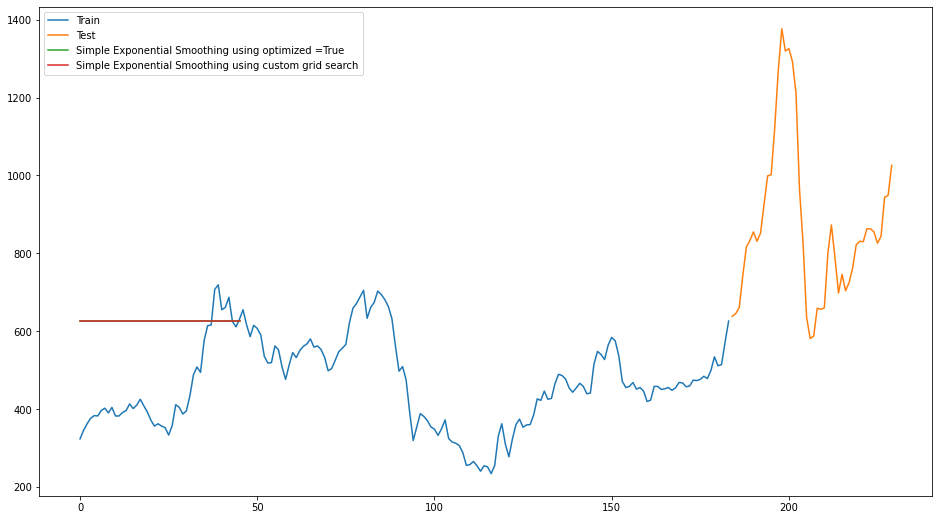

In [135]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['cpo_pri_grid_Search'])
df_fcst_gs_pred["new_index"] = range(230, 276)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['cpo_pri_auto_search'])
df_fcst_auto_pred["new_index"] = range(230, 276)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

###Double Exponential Smoothing (DES)

In [156]:
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [161]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(46)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Streaming output truncated to the last 5000 lines.
 RMSE is 968.763870195209
0.7 0.7 0.8 False
184     660.246938
185     707.916560
186     755.586181
187     803.255803
188     850.925425
189     898.595046
190     946.264668
191     993.934289
192    1041.603911
193    1089.273532
194    1136.943154
195    1184.612776
196    1232.282397
197    1279.952019
198    1327.621640
199    1375.291262
200    1422.960884
201    1470.630505
202    1518.300127
203    1565.969748
204    1613.639370
205    1661.308992
206    1708.978613
207    1756.648235
208    1804.317856
209    1851.987478
210    1899.657100
211    1947.326721
212    1994.996343
213    2042.665964
214    2090.335586
215    2138.005207
216    2185.674829
217    2233.344451
218    2281.014072
219    2328.683694
220    2376.353315
221    2424.022937
222    2471.692559
223    2519.362180
224    2567.031802
225    2614.701423
226    2662.371045
227    2710.040667
228    2757.710288
229    2805.379910
dtype: float64
 RMSE is 1099.40

In [162]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
647,0.9,0.9,0.8,True,202.367935,0.018329


In [163]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

In [164]:
Forecast_custom_pred = fit1.forecast(46)

In [165]:
fit1.summary()

Dep. Variable:,endog,No. Observations:,184
Model:,Holt,SSE,191643.485
Optimized:,False,AIC,1286.516
Trend:,Additive,BIC,1299.376
Seasonal:,None,AICC,1286.991
Seasonal Periods:,None,Date:,"Fri, 12 Nov 2021"
Box-Cox:,False,Time:,06:16:22
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_slope,0.6000000,beta,False


In [166]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 1162167.9176650923
MAE is : 848.8241903699055
RMSE is : 1078.0389221475689
MAPE is : 107.40522146120158
R2 is : -26.858095282904834



In [167]:
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)

In [169]:
fitESAUTOpred = fitESAUTO.forecast(46)

In [170]:
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 85242.32265804848
MAE is : 215.1294519667131
RMSE is : 291.9628789042341
MAPE is : 21.389638698677018
R2 is : -1.0433267092031002



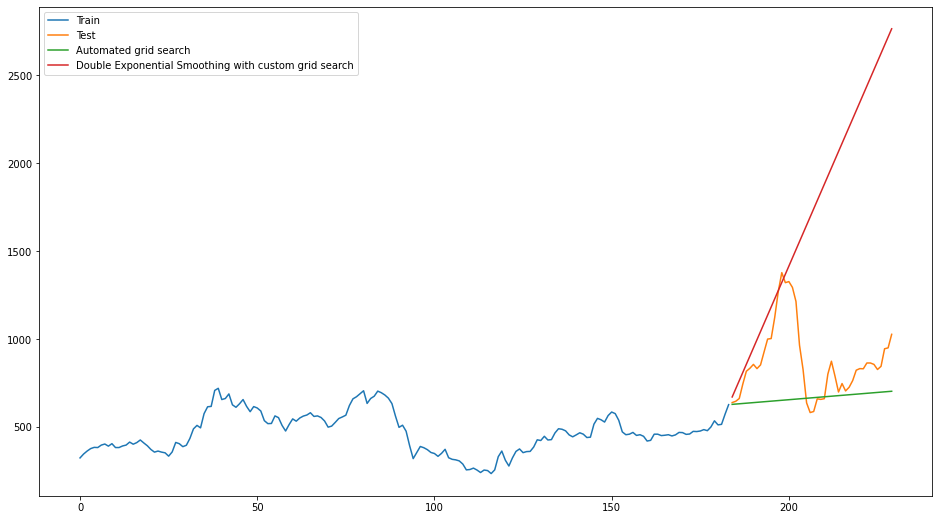

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

###Triple Exponential Smoothing (TES)

In [138]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],'seasonal_periods':[3,6,12], 'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False], 'use_boxcox':[True, False],
             'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))

In [144]:
df_results_moni = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                        'damping_slope','damped','use_boxcox','remove_bias','use_basinhopping','RMSE','r2'])
start = timer()
print('Starting Grid Search..')
for a,b in enumerate(pg):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')
    #print(trend,smoothing_level, smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping)
    fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level, 
                                    smoothing_slope=smoothing_slope, damping_slope = damping_slope,use_boxcox=use_boxcox,optimized=False)
    #fit1.summary
    z = fit1.forecast(46)
    #print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    #print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'trend':trend,'seasonal_periods':seasonal_periods,'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope,
                                        'damping_slope':damping_slope,'damped':damped,'use_boxcox':use_boxcox,'use_basinhopping':use_basinhopping,'RMSE':RMSE,'r2':r2}, ignore_index=True)
print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Starting Grid Search..
End of Grid Search
 Total time taken to complete grid search in seconds: 4759.644579104


In [145]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,trend,seasonal_periods,smoothing_level,smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping,RMSE,r2
55068,mul,3,0.9,0.8,0.8,True,True,NaN,True,197.742161,0.062695


In [153]:
fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).fit(smoothing_level=0.9,smoothing_slope=0.8, damping_slope = 0.8,use_boxcox=False,use_basinhopping = True,optimized=False)
Forecast_custom_pred = fit1.forecast(46)
fit1.summary()
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 271071688.8023302
MAE is : 10543.547471018557
RMSE is : 16464.254881479763
MAPE is : 1254.5214291498287
R2 is : -6496.805369059765



In [149]:
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

Dep. Variable:,endog,No. Observations:,184
Model:,ExponentialSmoothing,SSE,151479.000
Optimized:,True,AIC,1239.241
Trend:,None,BIC,1245.671
Seasonal:,None,AICC,1239.465
Seasonal Periods:,None,Date:,"Fri, 12 Nov 2021"
Box-Cox:,False,Time:,05:25:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,323.00000,l.0,True


In [151]:
fitESAUTOpred = fitESAUTO.forecast(46)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 101476.41304347826
MAE is : 248.1086956521739
RMSE is : 318.5536266368321
MAPE is : 25.11552432741552
R2 is : -1.4324708508665593



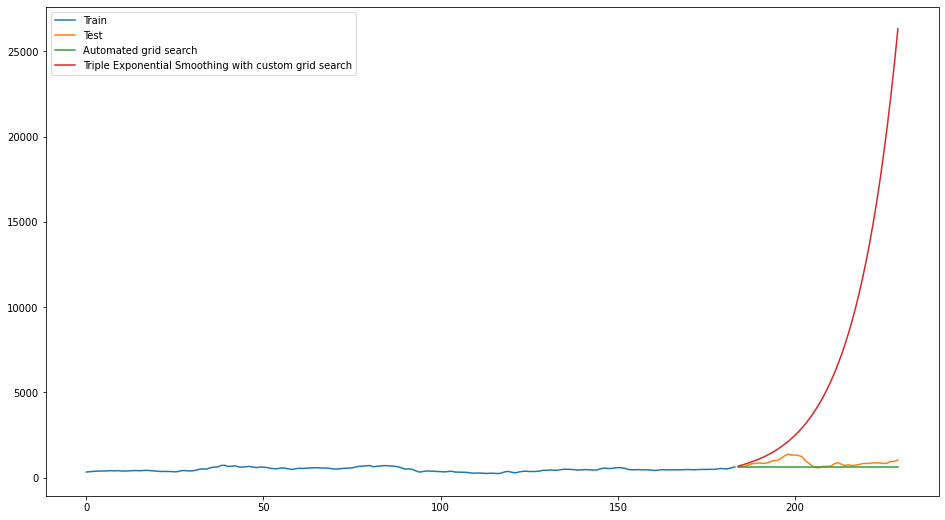

In [152]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

In [103]:
len(df)

1261

In [73]:
1261 - 30

1231

In [104]:
X = df['Close']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [97]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [105]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1261 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 69.1+ KB
None


In [108]:
df[df['Date'] == ''].index

Int64Index([], dtype='int64')

In [113]:
1261*.80

1008.8000000000001

In [116]:
1261*.85

1071.85

In [117]:
1261*.90

1134.9

In [114]:
1261*.75

945.75

In [115]:
1261*.70

882.6999999999999

In [111]:
len(df)

1261

In [112]:
1261-30

1231

In [110]:
1229 - 1259

-30

In [100]:
len(df)

1259

In [109]:
resu = []
temp_df = pd.DataFrame()
for i in [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

Fitting for smoothing level= 0
Evaluation metric results:-


ValueError: ignored

In [87]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-


ValueError: ignored

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1261 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 69.1+ KB


###Data pre-processing

In [60]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df['TimeIndex'] = pd.DataFrame(date_rng, columns=['Date'])

ParserError: ignored

In [8]:
del df['Unnamed: 0']

In [9]:
del df['Month']

In [10]:
df.head()

,cpo_pri,cno_pri,sbo_pri,pno_pri,TimeIndex
0,323,455,468.0,844.0,2002-02-28
1,345,546,485.0,799.0,2002-03-31
2,362,595,466.0,718.0,2002-04-30
3,376,636,442.0,614.0,2002-05-31
4,383,738,429.0,619.0,2002-06-30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   cpo_pri    230 non-null    int64         
 1   cno_pri    230 non-null    int64         
 2   sbo_pri    230 non-null    float64       
 3   pno_pri    230 non-null    float64       
 4   TimeIndex  230 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 9.1 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd268aa9710>,
      dtype=object)

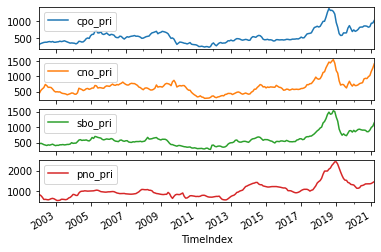

In [125]:
df.set_index('TimeIndex')[['cpo_pri', 'cno_pri','sbo_pri', 'pno_pri']].plot(subplots=True)

In [12]:
X = df['cpo_pri']
test = X.iloc[-46:]
train = X.iloc[:-46]

In [14]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')


In [15]:
resu = []
temp_df = pd.DataFrame()
for i in [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(46)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 203863.69272780698
MAE is : 402.6739011968901
RMSE is : 451.512671724512
MAPE is : 43.57458530527827
R2 is : -3.8867759042482017

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 174644.10080166106
MAE is : 364.59111176628636
RMSE is : 417.90441586762523
MAPE is : 38.98091916209685
R2 is : -3.1863588959714813

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 154346.41067488713
MAE is : 335.60242646948024
RMSE is : 392.869457549053
MAPE is : 35.48421253492241
R2 is : -2.6998070156626537

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 140875.8490418775
MAE is : 314.8943108714306
RMSE is : 375.3343163659266
MAPE is : 32.9863343349762
R2 is : -2.376906870354421

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 131207.04729844804
MAE is : 299.1481660912595
RMSE is : 362.2251334438957
MAPE is : 31.086984701092003
R2 is : -2.145137952846241


,RMSE,smoothing parameter
10,318.553627,1.0
9,323.166226,0.9
8,328.729260,0.8


In [16]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(46)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 174644.10096865846
MAE is : 364.59111199530645
RMSE is : 417.9044160674286
MAPE is : 38.98091918972197
R2 is : -3.1863588999745422



In [18]:
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(46)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)
fitSESauto.summary()

Evaluation metric results:-
MSE is : 101476.41304347826
MAE is : 248.1086956521739
RMSE is : 318.5536266368321
MAPE is : 25.11552432741552
R2 is : -1.4324708508665593



Dep. Variable:,endog,No. Observations:,184
Model:,SimpleExpSmoothing,SSE,151479.000
Optimized:,True,AIC,1239.241
Trend:,None,BIC,1245.671
Seasonal:,None,AICC,1239.465
Seasonal Periods:,None,Date:,"Fri, 12 Nov 2021"
Box-Cox:,False,Time:,01:58:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,323.00000,l.0,True


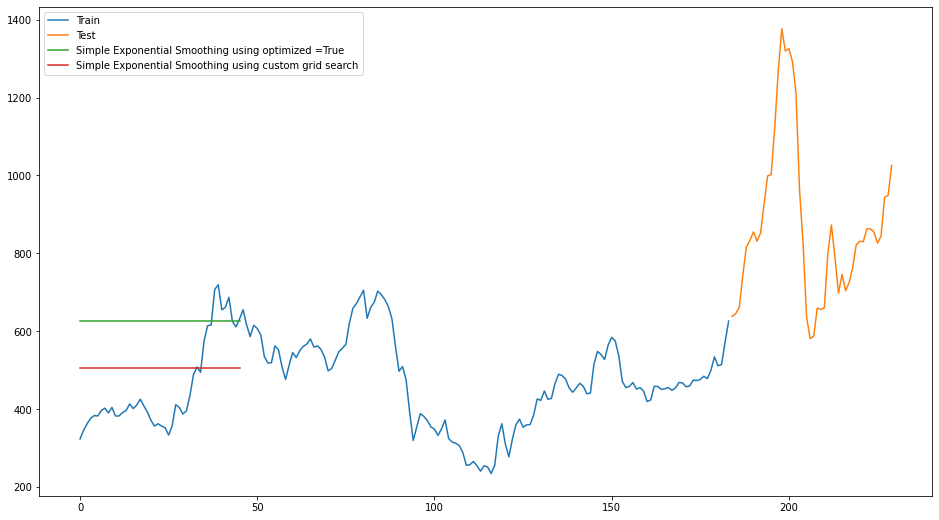

In [25]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(184, 230) #173,230
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(184, 230)  #173,230
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

In [24]:
230-57

173

In [126]:
df.set_index('TimeIndex')

,cpo_pri,cno_pri,sbo_pri,pno_pri
TimeIndex,,,,
2002-02-28,323,455,468.00,844.00
2002-03-31,345,546,485.00,799.00
2002-04-30,362,595,466.00,718.00
2002-05-31,376,636,442.00,614.00
2002-06-30,383,738,429.00,619.00
...,...,...,...,...
2020-11-30,826,993,860.28,1366.87
2020-12-31,844,1031,910.82,1366.87
2021-01-31,944,1170,997.62,1383.90


###Visualize the Monthly Crude Palm Oil Time-Series

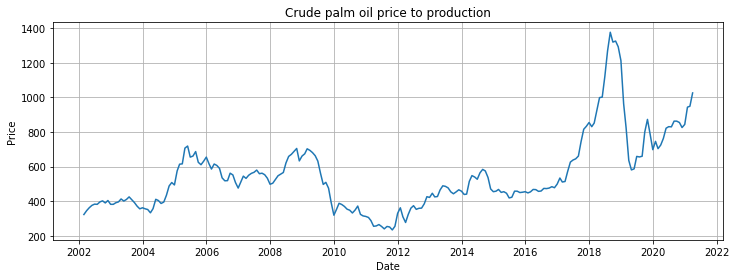

In [127]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(df.TimeIndex, df.cpo_pri)
plt.title('Crude palm oil price to production')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [128]:
# We split our dataset to be able to evaluate our models
split_date = '2017-06'
df_train = df.loc[df.TimeIndex <= split_date]
df_test = df.loc[df.TimeIndex > split_date]
print(f"{len(df_training)} Months of training data \n {len(df_test)} Months of testing data ")

184 days of training data 
 46 days of testing data 


In [147]:
X = df['cpo_pri']

testX = X.iloc[-46:]
trainX = X.iloc[:-46]

In [136]:
len(testX)

46

In [137]:
len(trainX)

184

In [129]:
# ADD time features to our model
def create_time_features(df, target=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.TimeIndex
    X = df.drop(['date'], axis=1)
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X

###Grid Search for Optimal Parameters

In [156]:
!pip import check_arrays

ERROR: unknown command "import"


In [155]:
from sklearn.utils.validation import check_arrays

ImportError: ignored

In [154]:
resu = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fit00ting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(trainX)).fit(i)
    fcst_pred_v= fit_v.forecast(46)
    timeseries_evaluation_metrics_func(testX,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

Fit00ting for smoothing level= 0
Evaluation metric results: 
MSE is : 203863.69272780698
MAE is : 402.6739011968901
RMSE is : 451.512671724512


NameError: ignored

In [143]:
temp_df.sort_values(by=['RMSE'])

,RMSE,smoothing parameter
10,318.553627,1.0
9,323.166226,0.9
8,328.729260,0.8
7,335.268166,0.7
6,342.858615,0.6
5,351.698846,0.5
4,362.225133,0.4
3,375.334316,0.3
2,392.869458,0.2
1,417.904416,0.1


The smoothing parameter was lowest at RMSE = 1

###Fit Simple Exponential Smoothing Model (SES)

In [150]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [151]:
SES = SimpleExpSmoothing(np.asarray(trainX))
fit_SES = SES.fit(smoothing_level = 1, optimized=False)

fcst_gs_pred = fit_SES.forecast(len(testX))
timeseries_evaluation_metrics_func(testX, fcst_gs_pred)

Evaluation metric results: 
MSE is : 101476.41304347826
MAE is : 248.1086956521739
RMSE is : 318.5536266368321


NameError: ignored

In [20]:
x = df[['cno_pri', 'sbo_pri', 'pno_pri']]
y = df[['cpo_pri']]

In [21]:
scaler_x = MinMaxScaler()   
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))       
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))               
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [22]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2, random_state=0)

###Split into Train and Test Sets:

In [ ]:
split_date = '2017-06'
df_training = df.loc[df.TimeIndex <= split_date]
df_test = df.loc[df.TimeIndex > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

184 days of training data 
 46 days of testing data 


In [ ]:
# Create time features to our model
def create_time_features(df, target=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    X = df.drop(['date'], axis=1)
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X

In [ ]:
x = df[['cno_pri', 'sbo_pri', 'pno_pri']]
y = df[['cpo_pri']]

In [ ]:
#y = np.reshape(y, (-1,1))

###Scale the Data

In [ ]:
scaler_x = MinMaxScaler()   
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))       
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))               
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2, random_state=0)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

###SVR Regressor

In [23]:
reg = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
reg.fit(X_train, y_train)
svr_pred = reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


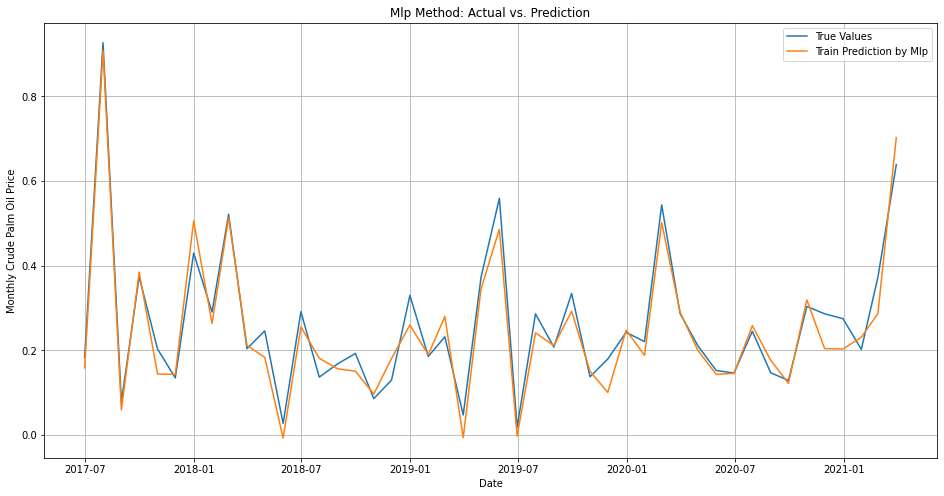

In [97]:
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(df_test.TimeIndex, y_test,  label = 'Test')
plt.plot(df_test.TimeIndex, svr_pred ,label = 'MLP Prediction')
plt.legend(['True Values', 'Train Prediction by Mlp', 'Test Prediction by Mlp'],loc='best')
plt.title('Mlp Method: Actual vs. Prediction')
plt.ylabel('Monthly Crude Palm Oil Price')
plt.xlabel('Date')
plt.show()

In [46]:
svr_predR = scaler_y.inverse_transform(svr_pred)

In [47]:
svr_predR 

array([[ 414.89563506],
       [1271.54924205],
       [ 301.4760098 ],
       [ 673.79205248],
       [ 398.41685482],
       [ 397.59734128],
       [ 812.2074713 ],
       [ 534.48193247],
       [ 820.51239446],
       [ 475.84995759],
       [ 443.26176716],
       [ 225.66558515],
       [ 525.87526743],
       [ 440.95396856],
       [ 412.65018722],
       [ 406.13175472],
       [ 344.27478876],
       [ 440.46799064],
       [ 530.66421457],
       [ 450.88166964],
       [ 553.74875676],
       [ 226.65427758],
       [ 628.03751852],
       [ 789.42051047],
       [ 230.98409646],
       [ 509.62814717],
       [ 475.08641491],
       [ 567.70945242],
       [ 405.7760627 ],
       [ 348.88242818],
       [ 517.00498759],
       [ 448.75867186],
       [ 807.06993114],
       [ 566.06681969],
       [ 462.40878601],
       [ 397.52649787],
       [ 400.21648451],
       [ 528.99063823],
       [ 435.70643471],
       [ 373.15138326],
       [ 598.55361527],
       [ 467.028

In [48]:
testY = scaler_y.inverse_transform(y_test)

In [49]:
testY2 = pd.DataFrame(testY, columns = ['Predictions'])

In [50]:
testY2

,Predictions
0,443.0
1,1293.0
2,323.0
3,661.0
4,466.0
5,388.0
6,725.0
7,566.0
8,830.0
9,467.0


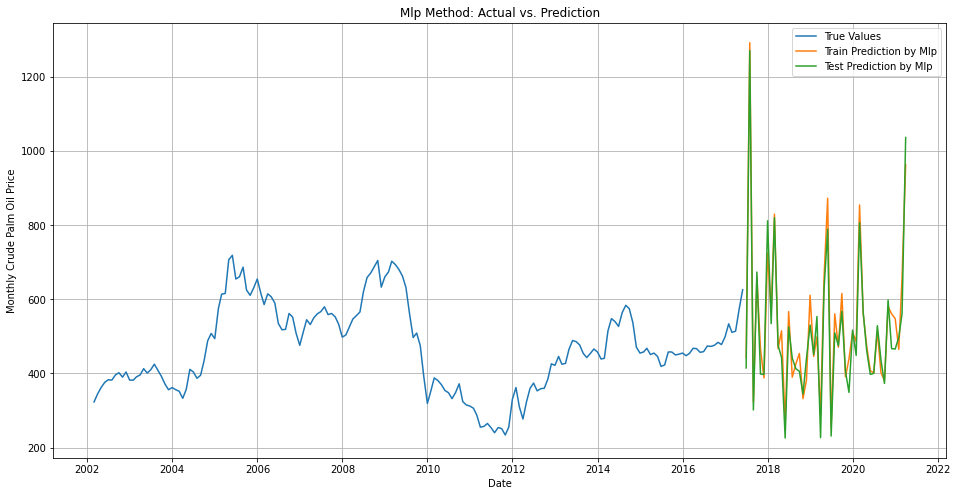

In [51]:
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(df_training.TimeIndex, df_training.cpo_pri, label = 'Train')
plt.plot(df_test.TimeIndex, testY2,  label = 'Test')
plt.plot(df_test.TimeIndex, svr_predR,label = 'MLP Prediction')
plt.legend(['True Values', 'Train Prediction by Mlp', 'Test Prediction by Mlp'],loc='best')
plt.title('Mlp Method: Actual vs. Prediction')
plt.ylabel('Monthly Crude Palm Oil Price')
plt.xlabel('Date')
plt.show()

####SVR Hyper Parameter Tuning Via Grid Search

In [56]:
#tune parameters
param_grid = {'C': [0.1, 1, 10, 100],
             'gamma' :[1, 0.1, 0.01, 0.001,],
             'kernel' :['rbf', 'poly', 'linear'],
              'epsilon': [1e-4, 1e-3]}
model = SVR()
grid = GridSearchCV(SVR(),param_grid,cv = 10, refit = True, verbose =3)
grid.fit(X_train,np.ravel(y_train))
svr_gpred = grid.predict(X_test)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=0.860, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=0.843, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=0.858, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=0.885, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=0.911, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=poly, score=-0.228, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=poly ...................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=poly, score=0.027, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=poly ...................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=poly, score=0.027, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=poly ...................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=poly, score=-0.281, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=poly ...................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=poly, score=-0.182, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear .................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear, score=0.866, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear .................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear, score=0.823, total=   0.0s
[CV] C=

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   11.2s finished


In [57]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

#best score
print(grid.best_score_)

{'C': 100, 'epsilon': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.9451066866001794


In [68]:
svr_grid_pred = np.reshape(svr_gpred, (-1,1))

In [69]:
svr_grid_pred  = scaler_y.inverse_transform(svr_grid_pred)

In [70]:
svr_grid_pred

array([[ 409.86145117],
       [1396.69535235],
       [ 304.56657892],
       [ 721.23412845],
       [ 426.97050518],
       [ 388.7290892 ],
       [ 774.81198785],
       [ 543.00417844],
       [ 811.48419941],
       [ 484.71287073],
       [ 484.76590792],
       [ 262.34888226],
       [ 550.10943184],
       [ 434.00947594],
       [ 407.4368628 ],
       [ 404.38815612],
       [ 334.22033422],
       [ 416.23628686],
       [ 546.05476794],
       [ 462.51291154],
       [ 561.49206328],
       [ 264.28191061],
       [ 648.19112543],
       [ 798.80912212],
       [ 267.07941003],
       [ 527.0363702 ],
       [ 489.60030551],
       [ 583.24523242],
       [ 400.29562104],
       [ 407.78802335],
       [ 529.85776729],
       [ 444.82392055],
       [ 826.0302329 ],
       [ 603.86695214],
       [ 433.7300155 ],
       [ 394.32343728],
       [ 396.96436876],
       [ 544.16382036],
       [ 421.86733687],
       [ 363.67935116],
       [ 615.21838812],
       [ 473.050

In [71]:
SVR_predictions = pd.DataFrame(svr_grid_pred, columns = ['svr_Predictions'])

In [72]:
SVR_predictions

,svr_Predictions
0,409.861451
1,1396.695352
2,304.566579
3,721.234128
4,426.970505
5,388.729089
6,774.811988
7,543.004178
8,811.484199
9,484.712871


####Plot the SVR Prediction

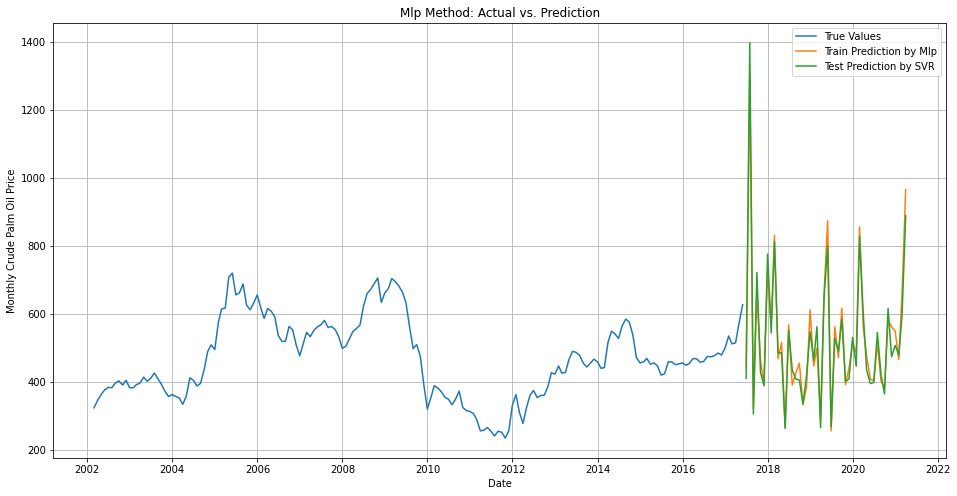

In [84]:
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(df_training.TimeIndex, df_training.cpo_pri, label = 'Train')
plt.plot(df_test.TimeIndex, testY2,  label = 'Test')
plt.plot(df_test.TimeIndex, SVR_predictions,label = 'SVR Prediction')
plt.legend(['True Values', 'Train Prediction by Mlp', 'Test Prediction by SVR'],loc='best')
plt.title('Mlp Method: Actual vs. Prediction')
plt.ylabel('Monthly Crude Palm Oil Price')
plt.xlabel('Date')
plt.show()

####Actual vs Predicted Zoomed-In

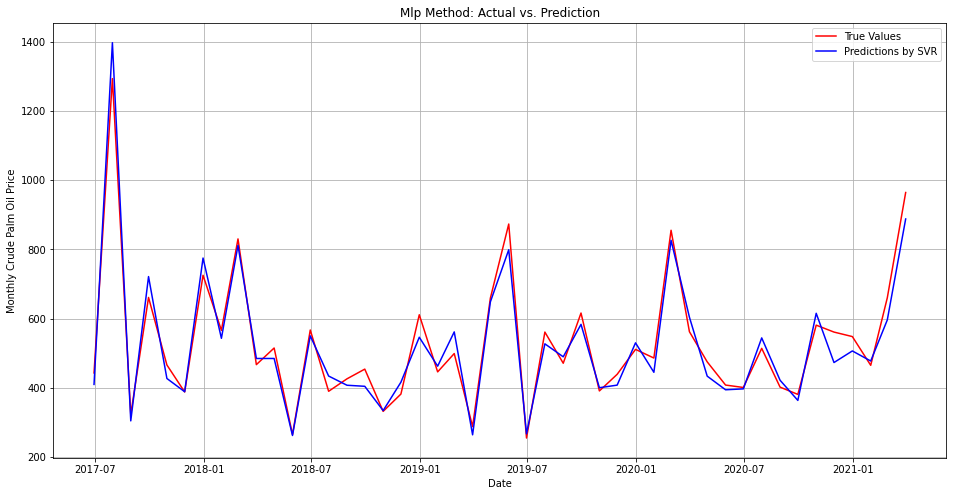

In [85]:
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(df_test.TimeIndex, testY2, color = 'red',  label = 'Test')
plt.plot(df_test.TimeIndex,  SVR_predictions, color = 'blue',label = 'SVR Prediction')
plt.legend(['True Values', 'Predictions by SVR', 'SVR Prediction'],loc='best')
plt.title('Mlp Method: Actual vs. Prediction')
plt.ylabel('Monthly Crude Palm Oil Price')
plt.xlabel('Date')
plt.show()

####Compute the Metrics for the MLP Model

In [92]:
MAE_svr = mean_absolute_error(y_test, svr_gpred)
print('MAE value of the SVR Model is:', MAE_svr)

MDA_svr = mda(y_test, svr_gpred)
print('MDA value of the SVR Model is:', MDA_svr)

MAPE_svr = MAPE(y_test, svr_gpred)
print('MAPE value of the SVR Model is:', (MAPE_svr))

RMSE_svr = mean_squared_error(y_test, svr_gpred, squared=False)
print('RMSE value of the SVR Model is:', (RMSE_svr))


MSE_svr = mean_squared_error(y_test, svr_gpred)
print('MSE value of the SVR Model is:', (MSE_svr))

MAE value of the SVR Model is: 0.02904121897289918
MDA value of the SVR Model is: 0.5002469135802469
MAPE value of the SVR Model is: 120.3319953446498
RMSE value of the SVR Model is: 0.03541114790935051
MSE value of the SVR Model is: 0.001253949396257899


In [ ]:
MAE value of the SVR Model is: 0.033374702451863116
MDA value of the SVR Model is: 0.8666666666666667
MAPE value of the SVR Model is: 20.442835824738605
RMSE value of the SVR Model is: 0.041745395608517526
MSE value of the SVR Model is: 0.001742678054511634